In [5]:
!pip install xlrd pandas

!pip install bnlearn

# Bayesian Networks

In this notebook, we will use bnlearn package to generate Bayesian Networks, based on structure learning and parameter learning. The generated Bayesian Networks will be used for inference. Using bnlearn package to learn a Bayesian network can be split into two problems:

- Structure learning: Given a set of data samples, estimate a DAG that captures the dependencies between the variables.

- Parameter learning: Given a set of data samples and a DAG that captures the dependencies between the variables, estimate the (conditional) probability distributions of the individual variables.

### Example: Building Bayesian Network and making inferences with Sprinkler data set

In [6]:
import bnlearn as bn

# load the Sprinkler dataset
df = bn.import_example()

df

[bnlearn] >Import dataset..


,Cloudy,Sprinkler,Rain,Wet_Grass
0,0,0,0,0
1,1,0,1,1
2,0,1,0,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
995,1,0,1,1
996,1,0,1,1
997,1,0,1,1
998,0,0,0,0


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


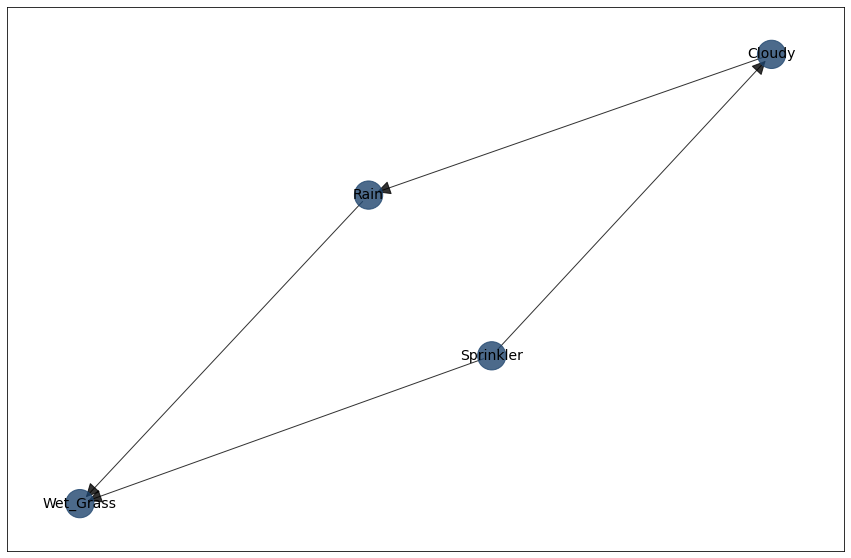

In [7]:
# Structure Learning: obtaining the network structure

model = bn.structure_learning.fit(df)

G = bn.plot(model)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Cloudy:
+-----------+--------------------+--------------------+
| Sprinkler | Sprinkler(0)       | Sprinkler(1)       |
+-----------+--------------------+--------------------+
| Cloudy(0) | 0.3988245172124265 | 0.6341161928306551 |
+-----------+--------------------+--------------------+
| Cloudy(1) | 0.6011754827875735 | 0.3658838071693449 |
+-----------+--------------------+--------------------+
[bnlearn] >CPD of Rain:
+---------+--------------------+---------------------+
| Cloudy  | Cloudy(0)          | Cloudy(1)           |
+---------+--------------------+---------------------+
| Rain(0) | 0.6518218623481782 | 0.33695652173913043 |
+---------+--------------------+---------------------+
| Rain(1) | 0.3481781376518219 | 0.6630434782608695  |
+---------+--------------------+--

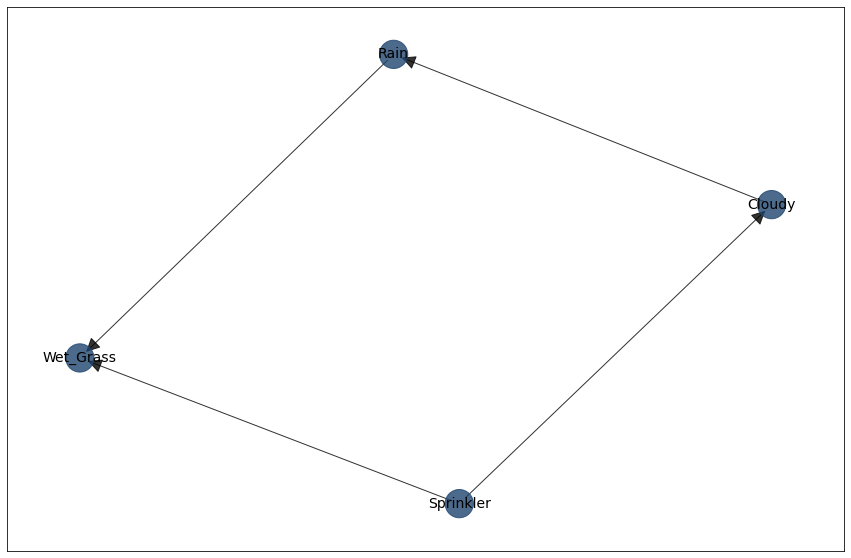

In [8]:
# learn the parameters of the DAG using the df
model_update = bn.parameter_learning.fit(model, df, methodtype="bayes")

# Make plot
G = bn.plot(model_update)

In [9]:
# performing inference
q_1 = bn.inference.fit(model_update, variables=['Wet_Grass'], evidence={'Cloudy':1,'Sprinkler':0, 'Rain':1})
q_2 = bn.inference.fit(model_update, variables=['Wet_Grass'], evidence={'Rain':1})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+-------------+----------+
|    |   Wet_Grass |        p |
+====+=============+==========+
|  0 |           0 | 0.255882 |
+----+-------------+----------+
|  1 |           1 | 0.744118 |
+----+-------------+----------+
[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+-------------+----------+
|    |   Wet_Grass |        p |
+====+=============+==========+
|  0 |           0 | 0.301393 |
+----+-------------+----------+
|  1 |           1 | 0.698607 |
+----+-------------+----------+


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 1

Learn a Bayesian Network of the artificial smart grid data set. Construct the network and make inferences for the following:

- P(Outage_Duration=Less_than_1H | Time=Morning, Demand_Factor=Medium)
- P(Demand_Factor=High | Overload=Yes, Time=Afternoon)
- P(Number_of_Customers=Low | Demand_Factor=High)


In [10]:
import pandas as pd

file = "./smart_grid.xlsx"

df_sg = data = pd.read_excel(file)

print(df_sg.columns)
df_sg

Index(['Season', 'Outage_Duration', 'Number_of_Customers', 'Overload',
       'Weather', 'Time', 'Demand_Factor', 'Day'],
      dtype='object')


,Season,Outage_Duration,Number_of_Customers,Overload,Weather,Time,Demand_Factor,Day
0,Autumn,Less_than_1H,Low,Yes,Cold,Morning,Low,Weekdays
1,Winter,Less_than_1H,Low,No,Cold,Evening,Low,Weekdays
2,Spring,More_than_1H,Low,No,Cold,Evening,Low,Weekdays
3,Winter,Less_than_1H,High,No,Warm,Morning,Low,Weekdays
4,Spring,More_than_1H,Low,No,Cold,Morning,Low,Weekend
...,...,...,...,...,...,...,...,...
695,Autumn,Less_than_1H,Low,Yes,Cold,Afternoon,High,Weekend
696,Summer,More_than_1H,Low,No,Warm,Evening,Medium,Weekend
697,Winter,Less_than_1H,High,Yes,Cold,Evening,Medium,Weekdays
698,Autumn,More_than_1H,Low,No,Cold,Afternoon,High,Weekend


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


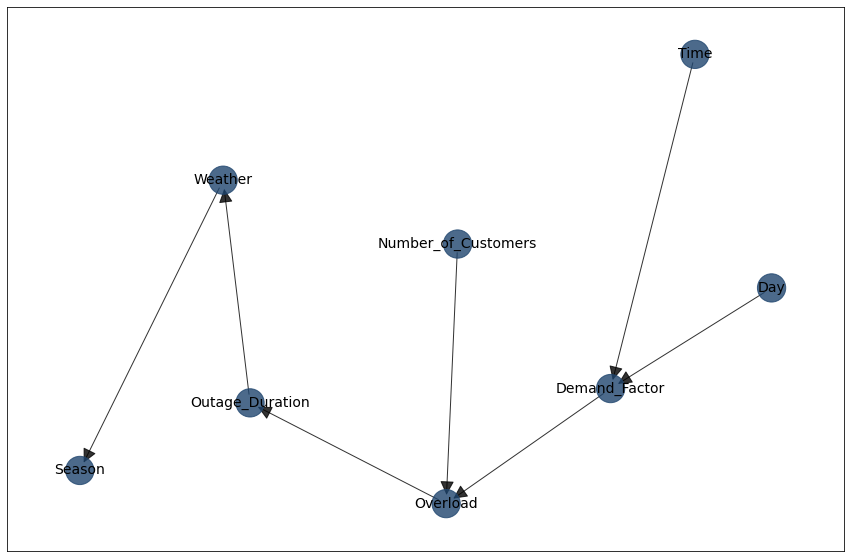

In [11]:
# Structure Learning: obtaining the network structure

model = bn.structure_learning.fit(df_sg)

G = bn.plot(model)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Outage_Duration:
+-------------------------------+--------------------+---------------------+
| Overload                      | Overload(No)       | Overload(Yes)       |
+-------------------------------+--------------------+---------------------+
| Outage_Duration(Less_than_1H) | 0.3964248159831756 | 0.5874499332443258  |
+-------------------------------+--------------------+---------------------+
| Outage_Duration(More_than_1H) | 0.6035751840168244 | 0.41255006675567424 |
+-------------------------------+--------------------+---------------------+
[bnlearn] >CPD of Weather:
+-----------------+-----+-------------------------------+
| Outage_Duration | ... | Outage_Duration(More_than_1H) |
+-----------------+-----+-------------------------------+
| Weather( Cold)  | ... | 0.579

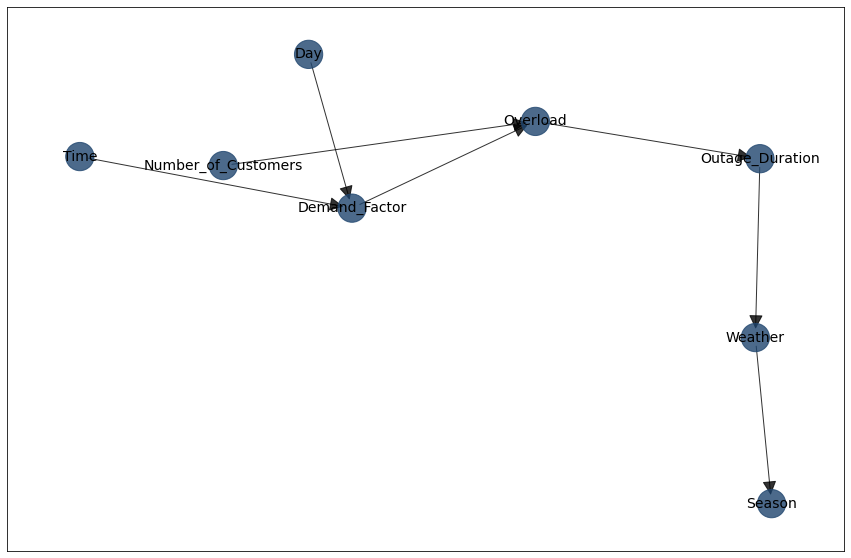

In [12]:
# learn the parameters of the DAG using the df

model_update1 = bn.parameter_learning.fit(model, df_sg, methodtype="bayes")

# Make plot
G = bn.plot(model_update1)

In [13]:
q_1 = bn.inference.fit(model_update1, variables=['Outage_Duration'], evidence={'Time':'Morning','Demand_Factor':'Medium'})
q_2 = bn.inference.fit(model_update1, variables=['Demand_Factor'], evidence={'Overload':'Yes','Time': 'Afternoon'})
q_3 = bn.inference.fit(model_update1, variables=['Number_of_Customers'], evidence={'Demand_Factor': 'High'})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+-------------------+----------+
|    |   Outage_Duration |        p |
+====+===================+==========+
|  0 |                 0 | 0.482832 |
+----+-------------------+----------+
|  1 |                 1 | 0.517168 |
+----+-------------------+----------+
[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+-----------------+----------+
|    |   Demand_Factor |        p |
+====+=================+==========+
|  0 |               0 | 0.374975 |
+----+-----------------+----------+
|  1 |               1 | 0.312742 |
+----+-----------------+----------+
|  2 |               2 | 0.312283 |
+----+-----------------+----------+
[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+-----------------------+----------+
|    |   Number_of_Customers |        p |
+====+=======================+==========+
|  0 |                     0 | 0.461176 |
+----+--------------